# Execute the code below

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,...,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,...,-2,143,116,116,0,1,8.7,very bad,1,5


# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [3]:
# Complete x, y and z in the script below:
px.scatter_3d(x='MAX_TEMPERATURE_C',
              y='MIN_TEMPERATURE_C',
              z='SUNHOUR',
              data_frame=df_weather)


Is it hard to read the 3D scatterplot ? You can move it with your mouse.

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y).

**Remember to save the result of your prediction in a new column 'predict'.**

In [7]:
variables = ['MIN_TEMPERATURE_C', 'SUNHOUR']
X = df_weather[variables]
y = df_weather['MAX_TEMPERATURE_C']
model = LinearRegression().fit(X, y)
df_weather['predict'] = model.predict(df_weather[variables])

### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours



In [9]:
px.scatter_3d(x='predict',
            y='MIN_TEMPERATURE_C',
            z='SUNHOUR',
            data_frame=df_weather)

**Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !**

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware :
- variables must be numeric
- your target (MAX temperature) should not be present in variables

Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict2' in orange dots

Expected result:

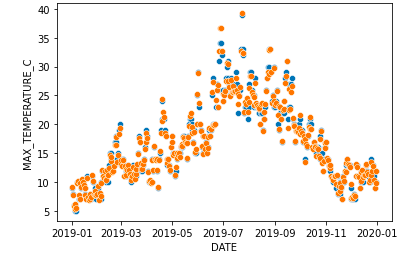

<Axes: xlabel='DATE', ylabel='MAX_TEMPERATURE_C'>

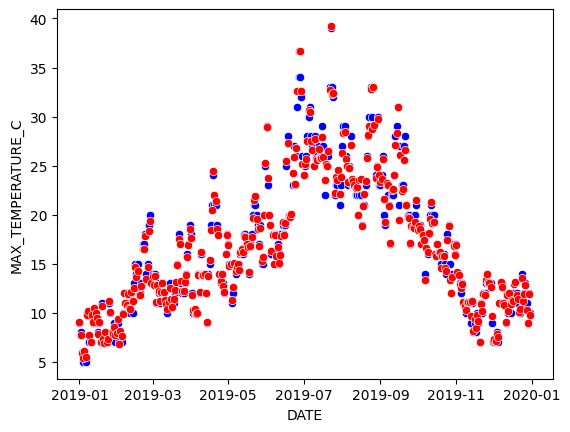

In [13]:
# exluded DATE related columns
variables = ['MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING',
       'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM',
       'UV_INDEX', 'SUNHOUR']
X = df_weather[variables]
y = df_weather['MAX_TEMPERATURE_C']
model = LinearRegression().fit(X, y)
df_weather['predict2'] = model.predict(df_weather[variables])

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

sns.scatterplot(x='DATE', y='MAX_TEMPERATURE_C', data=df_weather, color='blue')
sns.scatterplot(x='DATE', y='predict2', data=df_weather, color='red')

You can read coefficient for each column with the attribute `.coef_`. Which column has the biggest coefficient ?

In [30]:
coef_mapping = dict(zip(X.columns, model.coef_))
for key, value in coef_mapping.items():
    print(key, value)

max_key = max(coef_mapping, key=coef_mapping.get)
max_value = coef_mapping[max_key]

print(f'The max coef is {max_key}={max_value}')


MIN_TEMPERATURE_C 0.05743184113678023
WINDSPEED_MAX_KMH -0.0024352877555794405
TEMPERATURE_MORNING_C -0.08268374414565022
TEMPERATURE_NOON_C 0.18816823718726247
TEMPERATURE_EVENING_C 0.1771915316005952
PRECIP_TOTAL_DAY_MM 0.005210499159367965
HUMIDITY_MAX_PERCENT -0.0027953224455115706
VISIBILITY_AVG_KM 0.008433573684342882
PRESSURE_MAX_MB -0.0018879020321533057
CLOUDCOVER_AVG_PERCENT -0.006331518295059505
HEATINDEX_MAX_C 0.5830201683414977
DEWPOINT_MAX_C -0.03643234651173293
WINDTEMP_MAX_C 0.05792033964479782
WEATHER_CODE_MORNING 0.000521813394366072
WEATHER_CODE_NOON 4.0832612770476983e-05
WEATHER_CODE_EVENING -0.0002745298715272037
TOTAL_SNOW_MM -3.3306690738754696e-16
UV_INDEX -0.028901273840493083
SUNHOUR -0.022570133780463627
The max coef is HEATINDEX_MAX_C=0.5830201683414977
